# Compartmental Differences Analysis

In [2]:
# pandas: Helps us load, explore, and manipulate data tables
import pandas as pd

# seaborn: Makes it easy to create beautiful and informative plots
import seaborn as sns

# scipy: Provides statistical tools for analyzing data
from scipy import stats
import scipy

# matplotlib: Allows us to customize and display our plots
import matplotlib.pyplot as plt

# statannot: Adds statistical annotations (like p-values) to plots
from statannot import add_stat_annotation

# Optional: Configure pandas to display more rows and columns (so we can see more of the dataset at once)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Optional: Set a nice default style for plots
sns.set(style="whitegrid")

# Confirm to students that everything is ready
print("All libraries are imported, and we're ready to go!")


All libraries are imported, and we're ready to go!


## Data

In [3]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv("/Users/justi/DATA_481_766_protein_networks-1/protein_networks/data/lung_cancer.csv", index_col=0)

# Display the first few rows to ensure it loaded correctly
print("Dataset loaded successfully! Here are the first few rows:")
df_cell.head()

Dataset loaded successfully! Here are the first few rows:


01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_HER2_nuc_mean  02_CyclinD1_nuc_mean  02_EGFR_nuc_mean  \
index_column                                                             
cell_24               0.996370             -0.217049         -0.177764   
cell_31               0.416186             -0.523494         -0.444546   
cell_36               0.273643             -0.855136         -0.445459   
cell_43              -0.258488             -1.004050         -0.582779   
cell_51               0.909262             -0.538657          1.243933   

              03_FGFR2_nuc_mean  03_CDC6_nuc_mean  03_EZH2_nuc_mean  \
index_column                                                          
cell_24                0.109605          1.356144          0.482767   
cell_31               -0.218084          0.560125          0.388460   
cell_36               -0.495221          0.306739         -0.401794   
cell_43               -0.864614         -0.471185         -0.527605   
cell_51               -0.292941         -0.317952          0.356104   

              04_cMycS62_nuc_mean  04_FOXO1_nuc_mean  04_HER2_nuc_mean  \
index_column                                                             
cell_24                 -0.536020          -0.987532         -0.897249   
cell_31                  0.624579          -0.696834         -0.698082   
cell_36                  0.390856          -0.824935         -0.611346   
cell_43                 -0.821571          -0.864645         -0.990543   
cell_51                 -1.060728          -0.793165          0.505676   

              05_cMycT58_nuc_mean  05_CyclinA_nuc_mean  05_CyclinB1_nuc_mean  \
index_column                                                                   
cell_24                  0.243860            -0.927233             -0.002703   
cell_31                  0.404130             0.377436              0.506497   
cell_36                 -0.104029            -0.369246             -0.081758   
cell_43                 -0.607014            -0.717098             -0.687771   
cell_51                 -0.859886            -0.976564             -0.010725   

              06_FOXO3A_nuc_mean  06_AKT_nuc_mean  06_ZEB1_nuc_mean  \
index_column                                                          
cell_24                 0.406510        -0.457381          0.887332   
cell_31                 0.032809        -0.538555          0.346244   
cell_36                 0.202629        -0.745466         -0.057875   
cell_43                 0.153157        -0.843331         -0.112361   
cell_51                -0.142979         0.121853          1.201399   

              07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  07_p21_nuc_mean  \
index_column                                                             
cell_24                      0.114794       -0.430899         1.254235   
cell_31                      1.209497        0.987865         0.753873   
cell_36                      0.507749        0.167409         0.202370   
cell_43                      0.669902        0.363792        -0.009721   
cell_51                     -1.370445       -1.067327         0.643206   

              08_CDT1_nuc_mean  08_MDM2_nuc_mean  09_SKP2_nuc_mean  \
index_column                                                         
cell_24               1.871959          0.461608          0.422949   
cell_31              -0.235938         -0.070285          1.566281   
cell_36              -0.516313         -0.422799          1.228007   
cell_43              -0.684535         -0.385856          0

Predefined nuclear/cytoplasmic proteins. Adding HER2 to both for high and low classification.

In [4]:
all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '03_EZH2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '12_EZH2_nuc_mean', '12_cPARP_nuc_mean', "02_HER2_nuc_mean"]

all_Cyt_or_nuc = ['01_CDK2_ring_mean', '02_EGFR_ring_mean', '03_FGFR2_ring_mean', 
 '06_FOXO3A_ring_mean', '06_AKT_ring_mean', '09_mTOR_ring_mean', 
 '11_CDH1_ring_mean', '12_cPARP_ring_mean', "02_HER2_ring_mean"]

In [5]:
data = df_cell
nuc_data = data[all_nuc_or_cyt]
cyt_data = data[all_Cyt_or_nuc]
nuc_data.head()

01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_CyclinD1_nuc_mean  03_CDC6_nuc_mean  03_EZH2_nuc_mean  \
index_column                                                             
cell_24                  -0.217049          1.356144          0.482767   
cell_31                  -0.523494          0.560125          0.388460   
cell_36                  -0.855136          0.306739         -0.401794   
cell_43                  -1.004050         -0.471185         -0.527605   
cell_51                  -0.538657         -0.317952          0.356104   

              04_cMycS62_nuc_mean  04_FOXO1_nuc_mean  05_cMycT58_nuc_mean  \
index_column                                                                
cell_24                 -0.536020          -0.987532             0.243860   
cell_31                  0.624579          -0.696834             0.404130   
cell_36                  0.390856          -0.824935            -0.104029   
cell_43                 -0.821571          -0.864645            -0.607014   
cell_51                 -1.060728          -0.793165            -0.859886   

              05_CyclinA_nuc_mean  05_CyclinB1_nuc_mean  06_FOXO3A_nuc_mean  \
index_column                                                                  
cell_24                 -0.927233             -0.002703            0.406510   
cell_31                  0.377436              0.506497            0.032809   
cell_36                 -0.369246             -0.081758            0.202629   
cell_43                 -0.717098             -0.687771            0.153157   
cell_51                 -0.976564             -0.010725           -0.142979   

              06_ZEB1_nuc_mean  07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  \
index_column                                                              
cell_24               0.887332                 0.114794       -0.430899   
cell_31               0.346244                 1.209497        0.987865   
cell_36              -0.057875                 0.507749        0.167409   
cell_43              -0.112361                 0.669902        0.363792   
cell_51               1.201399                -1.370445       -1.067327   

              07_p21_nuc_mean  08_CDT1_nuc_mean  08_MDM2_nuc_mean  \
index_column                                                        
cell_24              1.254235          1.871959          0.461608   
cell_31              0.753873         -0.235938         -0.070285   
cell_36              0.202370         -0.516313         -0.422799   
cell_43             -0.009721         -0.684535         -0.385856   
cell_51              0.643206         -0.438881          1.183240   

              09_SKP2_nuc_mean  10_TGFbeta_nuc_mean  10_E2F1_nuc_mean  \
index_column                                                            
cell_24               0.422949            -0.434054         -0.922134   
cell_31               1.566281            -0.004364         -0.017985   
cell_36               1.228007             0.007855         -0.462886   
cell_43               0.154523            -0.237356         -0.532523   
cell_51              -0.800889            -0.426352         -0.661457   

              11_cFOS_nuc_mean  12_EZH2_nuc_mean  12_cPARP_nuc_mean  \
index_column                                                          
cell_24               0.300361          0.626121           0.519019   
cell_31               0.250767          1.478013           0.019616   
cell_36              -0.072239          0.222873          -0.226078   
cell_43              -0.709584   

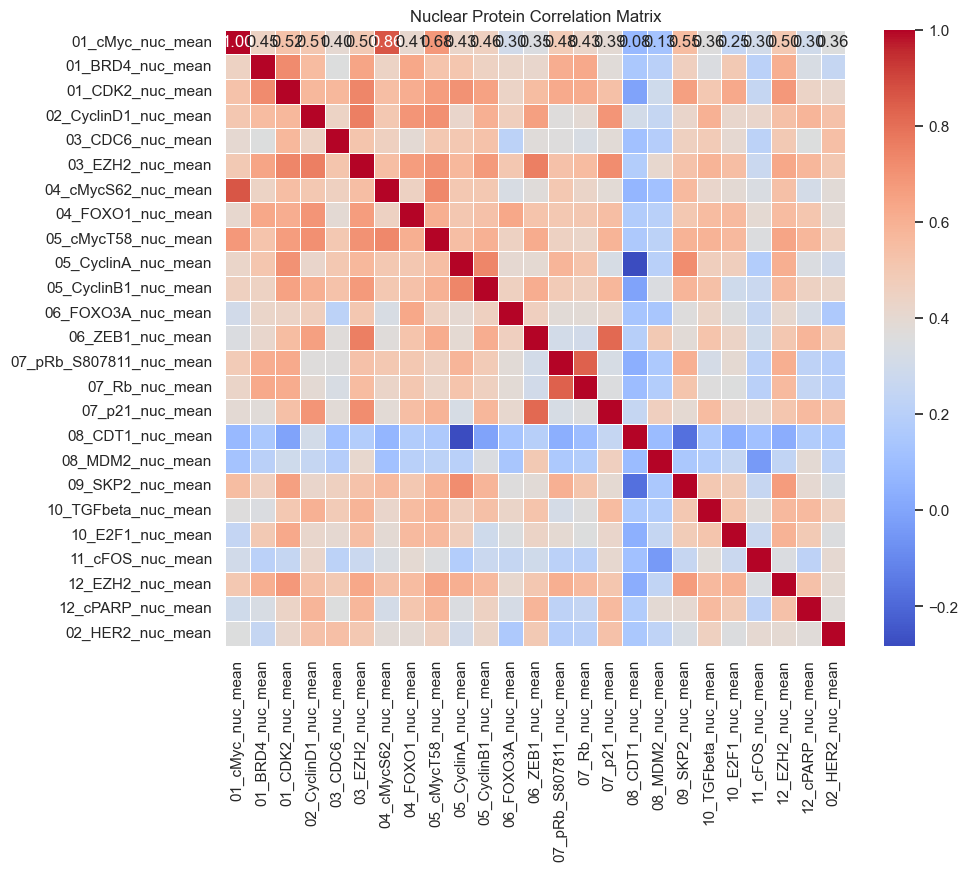

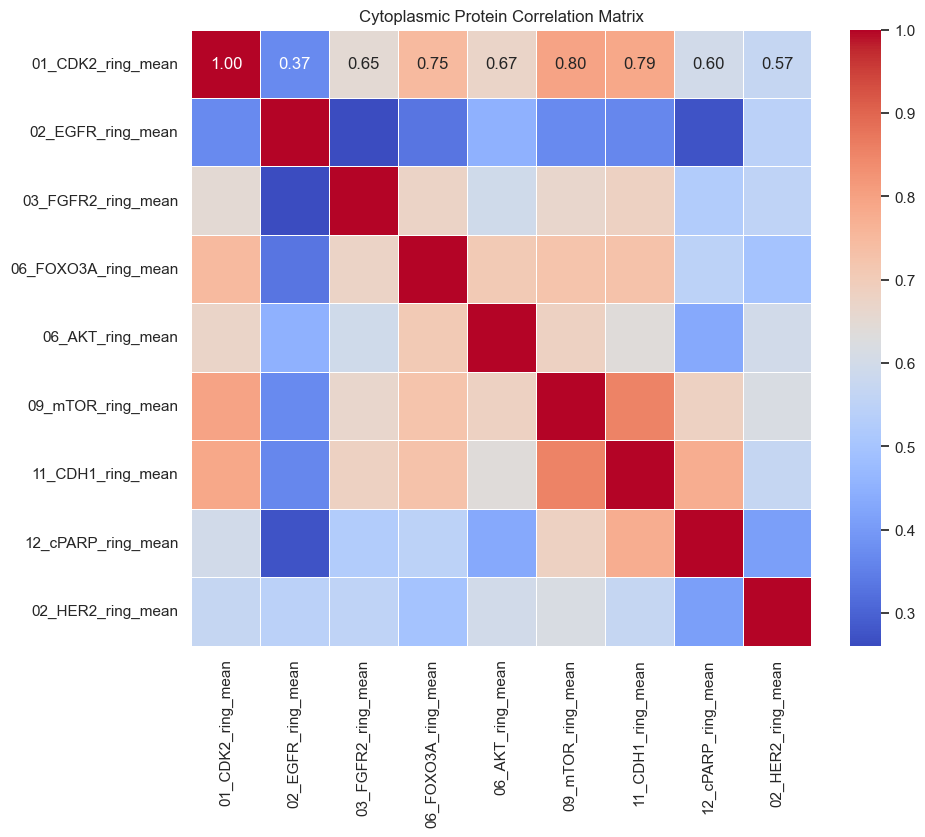

In [6]:
nuc_corr_matrix = nuc_data.corr(method="pearson")
cyt_corr_matrix = cyt_data.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(nuc_corr_matrix, annot=True, cmap="coolwarm", fmt= ".2f", linewidths=0.5)
plt.title("Nuclear Protein Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cyt_corr_matrix, annot=True, cmap="coolwarm", fmt= ".2f", linewidths=0.5)
plt.title("Cytoplasmic Protein Correlation Matrix")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

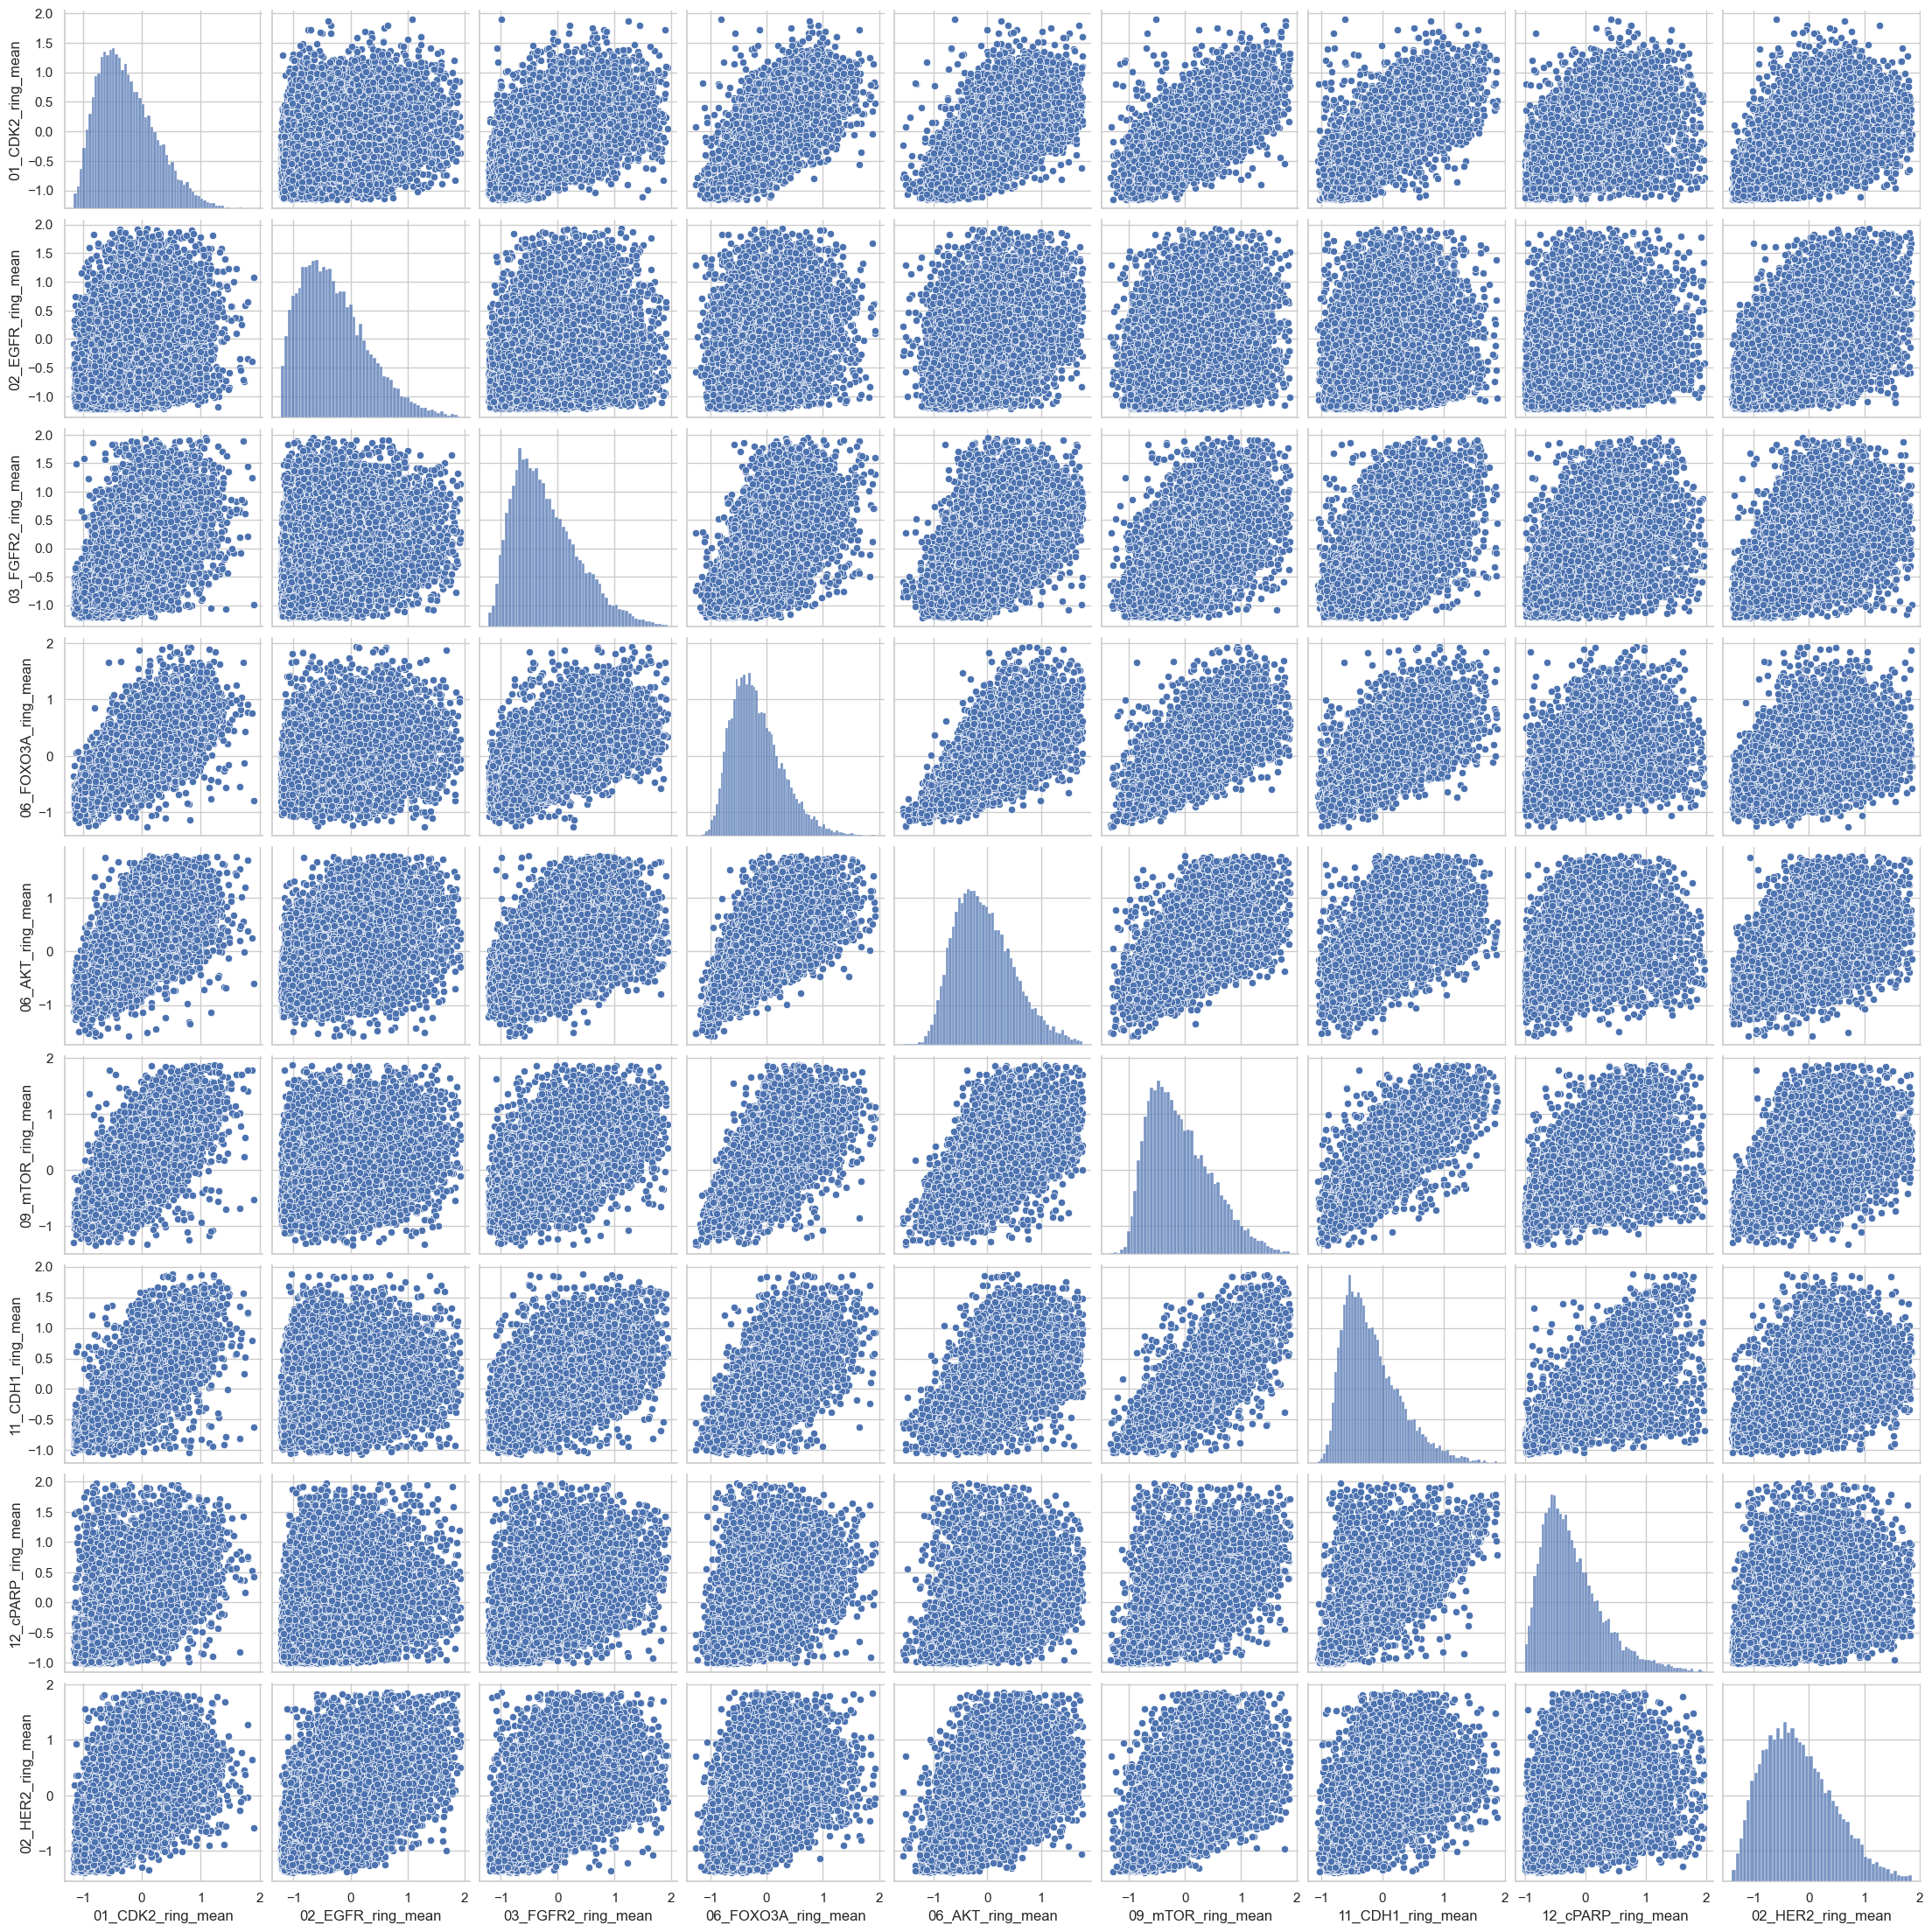

In [7]:
sns.pairplot(cyt_data)
plt.show()

Let's look at HER2 high and HER2 low:

In [8]:
# Dataset and HER2 condition column
nuc_data_2 = nuc_data
cond = '02_HER2_nuc_mean'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = nuc_data_2[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = nuc_data_2[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
nuc_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group
nuc_data_2.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
nuc_data_2.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
print(nuc_data_2[['HER2_Group', cond]].head())  # Display the HER2 group and condition

Updated dataset with HER2 groups:
             HER2_Group  02_HER2_nuc_mean
index_column                             
cell_24       High HER2          0.996370
cell_31          Middle          0.416186
cell_36          Middle          0.273643
cell_43          Middle         -0.258488
cell_51       High HER2          0.909262


/var/folders/s7/d4v3110x611f7tfytvt1b2f40000gn/T/ipykernel_1952/2507742286.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuc_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group


Now for cytoplasm:

In [9]:
# Dataset and HER2 condition column
cyt_data_2 = cyt_data
cond = '02_HER2_ring_mean'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = cyt_data_2[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = cyt_data_2[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
cyt_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group
cyt_data_2.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
cyt_data_2.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
print(cyt_data_2[['HER2_Group', cond]].head())  # Display the HER2 group and condition

Updated dataset with HER2 groups:
             HER2_Group  02_HER2_ring_mean
index_column                              
cell_24       High HER2           1.319311
cell_31       High HER2           0.890622
cell_36          Middle           0.236957
cell_43          Middle          -0.554567
cell_51          Middle          -0.289053


/var/folders/s7/d4v3110x611f7tfytvt1b2f40000gn/T/ipykernel_1952/4161370254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyt_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group


In [10]:
nuc_high = nuc_data_2.loc[nuc_data_2["HER2_Group"] == "High HER2"].drop('HER2_Group',axis=1)
nuc_low = nuc_data_2.loc[nuc_data_2["HER2_Group"] == "Low HER2"].drop('HER2_Group',axis=1)

cyt_high = cyt_data_2.loc[cyt_data_2["HER2_Group"] == "High HER2"].drop('HER2_Group',axis=1)
cyt_low = cyt_data_2.loc[cyt_data_2["HER2_Group"] == "Low HER2"].drop('HER2_Group',axis=1)



Nuclear high vs Nuclear low

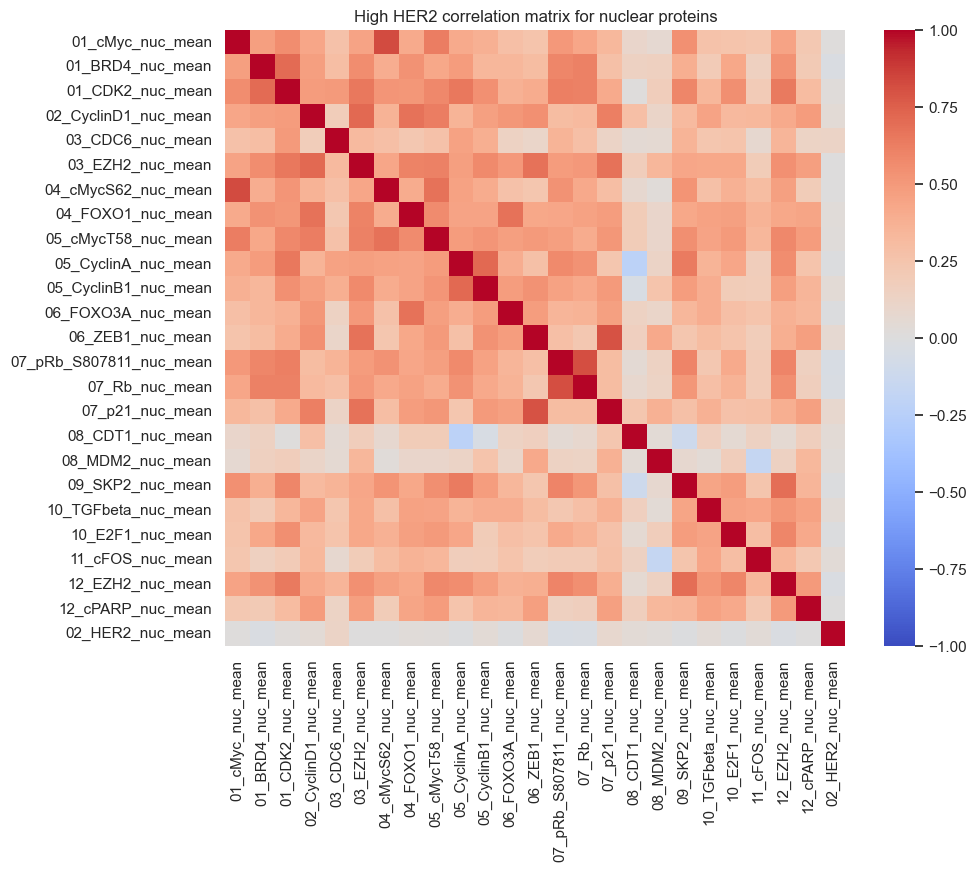

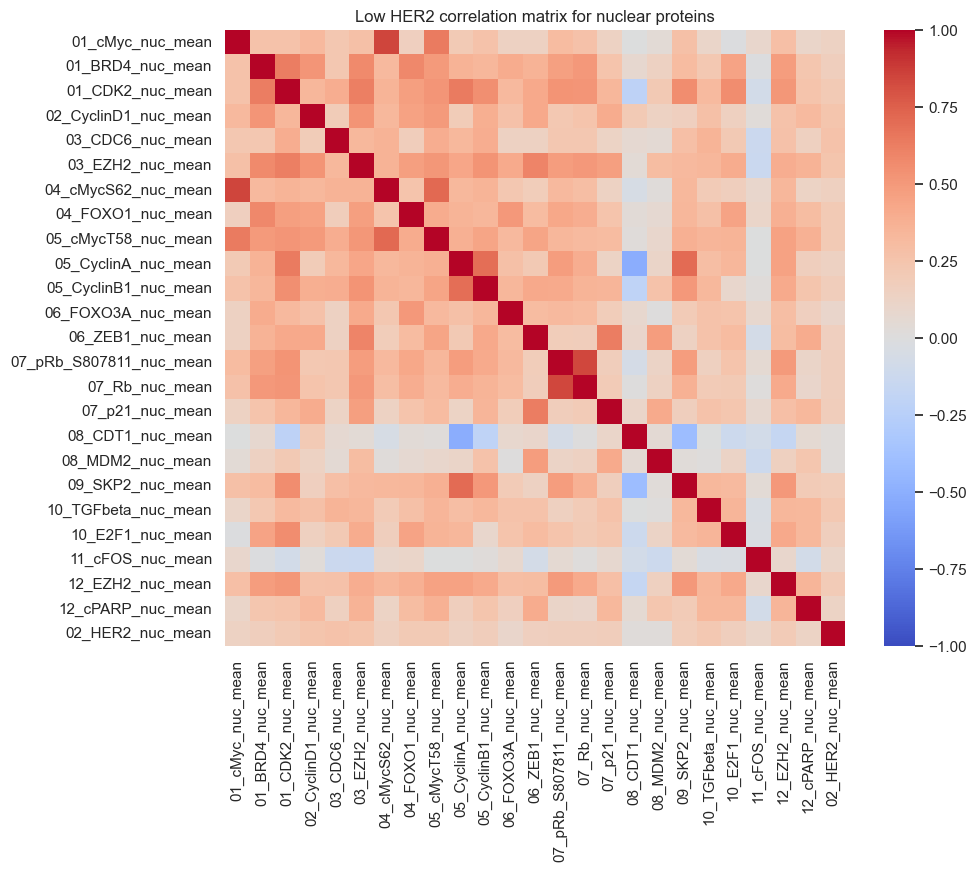

In [11]:
nuc_high_corr = nuc_high.corr(method= "pearson")

plt.figure(figsize=(10,8))
sns.heatmap(nuc_high_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("High HER2 correlation matrix for nuclear proteins")
plt.show()

nuc_low_corr = nuc_low.corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(nuc_low_corr, cmap="coolwarm",vmin=-1, vmax=1)
plt.title("Low HER2 correlation matrix for nuclear proteins")

plt.show()

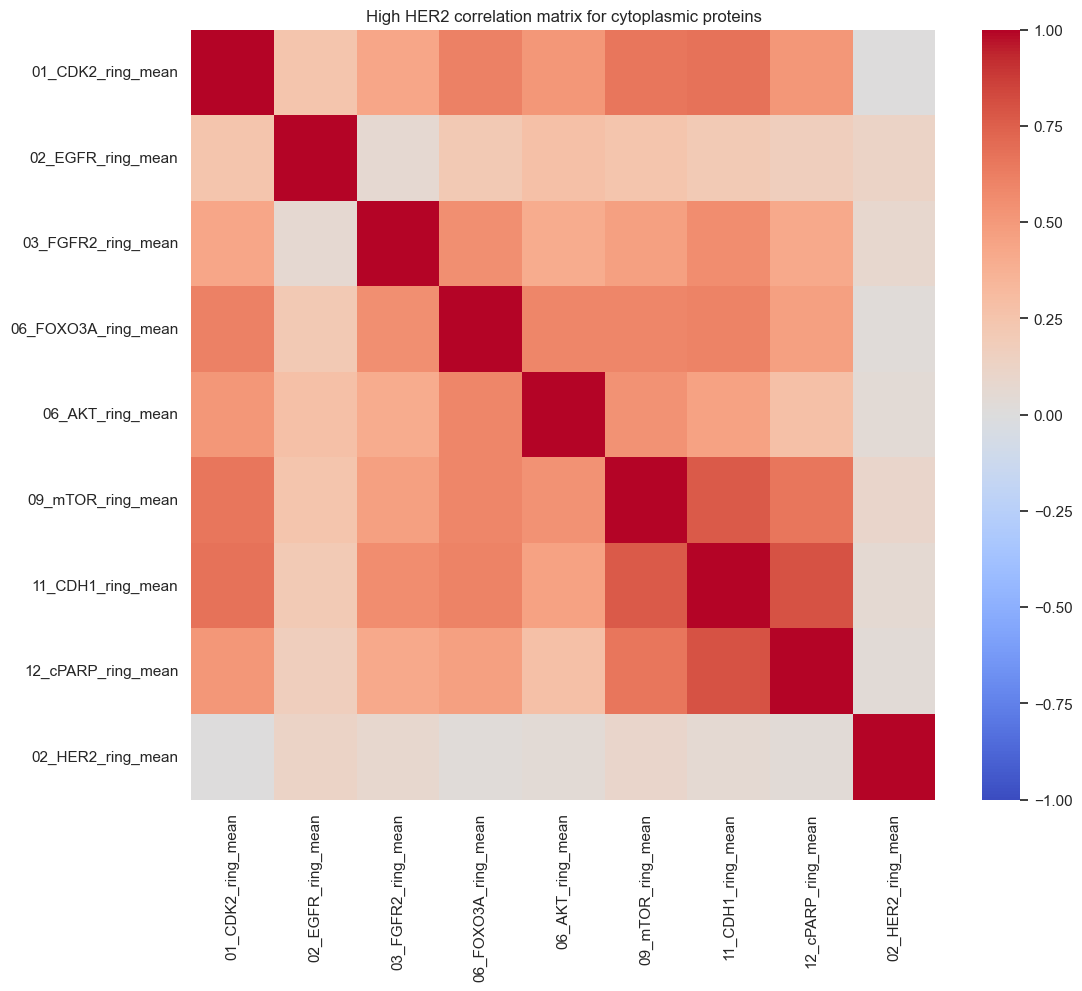

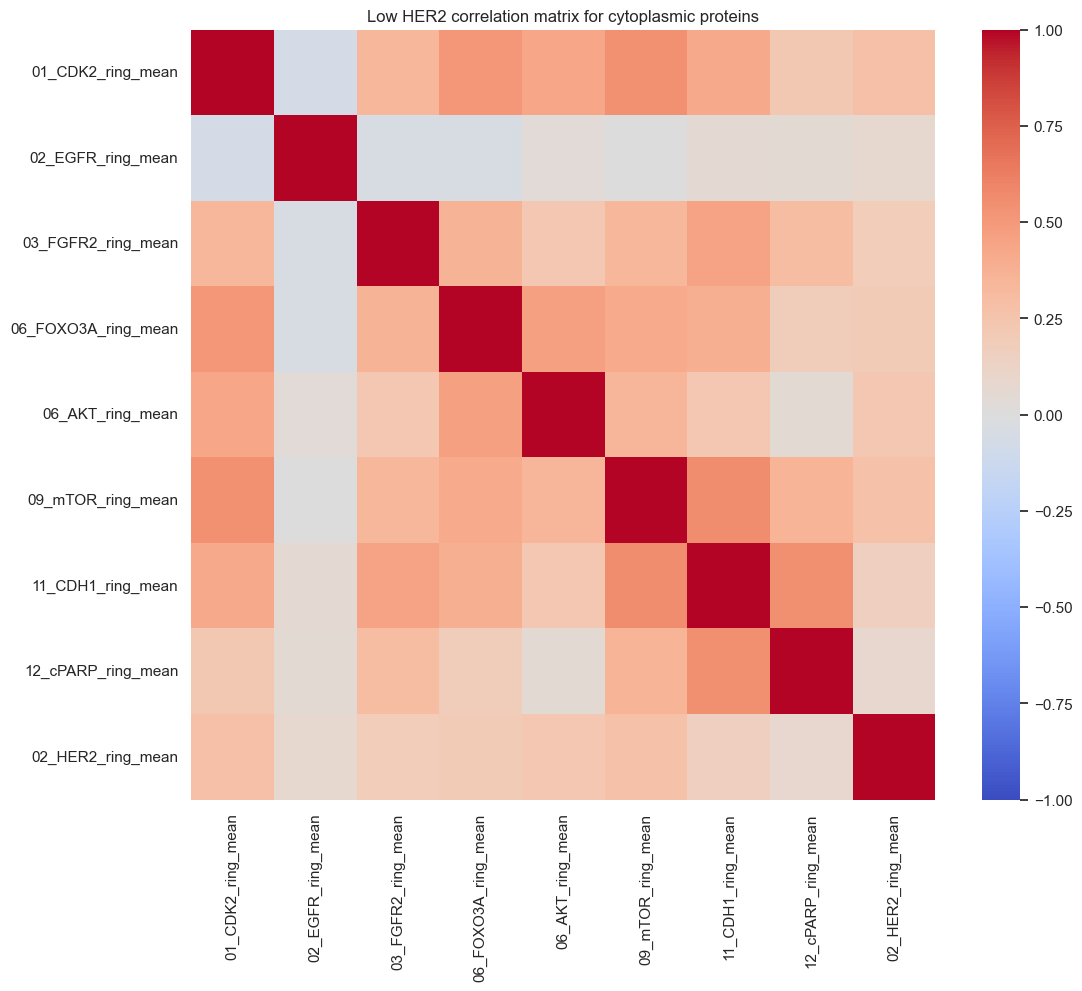

In [12]:
cyt_high_corr = cyt_high.corr(method= "pearson")

plt.figure(figsize=(12,10))
sns.heatmap(cyt_high_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("High HER2 correlation matrix for cytoplasmic proteins")
plt.show()

cyt_low_corr = cyt_low.corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(cyt_low_corr, cmap="coolwarm",vmin=-1, vmax=1)
plt.title("Low HER2 correlation matrix for cytoplasmic proteins")
plt.show()

In [13]:
print(cyt_high_corr.loc())

# Feature Selection/Classification Methods

Now, going to take a look at ways we can select important proteins, and/or classify HER2 low vs. high cells.

In [14]:
cyt_data.head()

01_CDK2_ring_mean  02_EGFR_ring_mean  03_FGFR2_ring_mean  \
index_column                                                             
cell_24                0.868095          -0.006708            0.263158   
cell_31                0.915782          -0.101312            0.144229   
cell_36               -0.103745          -0.307542           -0.419718   
cell_43               -0.832541          -0.596149           -1.019525   
cell_51               -0.295508           0.237827           -0.965990   

              06_FOXO3A_ring_mean  06_AKT_ring_mean  09_mTOR_ring_mean  \
index_column                                                             
cell_24                  0.513783         -0.151589           1.464958   
cell_31                  0.379366         -0.188642           1.360996   
cell_36                 -0.024514         -0.642016           0.460337   
cell_43                 -0.389840         -0.950625          -0.018206   
cell_51                 -0.455724          0.159394           0.037728   

              11_CDH1_ring_mean  12_cPARP_ring_mean  02_HER2_ring_mean  \
index_column                                                             
cell_24                0.589119            0.368686           1.319311   
cell_31                0.240999            0.188836           0.890622   
cell_36               -0.290657           -0.211352           0.236957   
cell_43               -0.599372           -0.556434          -0.554567   
cell_51               -0.498345           -0.509151          -0.289053   

             HER2_Group  
index_column             
cell_24       High HER2  
cell_31       High HER2  
cell_36          Middle  
cell_43          Middle  
cell_51          Middle

### Decision Trees

Decision trees can capture non-linear relationships in the data. This can give us insights into HER2 status that correlation coefficients can't.
 - CART Trees
 - GODST Trees (new method)
 

### Logistic Regression

First, I want to implement an unsupervised method to gain as much information from the data as possible. We've spent a lot of time looking at HER2 and the correlations with different variables, but I want to know what a model would see without any biological knowledge. Let's go for K-means clustering.

## K-means clustering

In [15]:
data = df_cell

First, I want to check how standardized the data is.

In [20]:
summary_stats = data.describe().loc[['mean', 'std', 'max']]
print(summary_stats)

      01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  02_HER2_nuc_mean  \
mean         -0.252508         -0.177839         -0.242238         -0.218175   
std           0.557137          0.585063          0.543990          0.621482   
max           1.870646          1.803942          1.829043          1.809439   

      02_CyclinD1_nuc_mean  02_EGFR_nuc_mean  03_FGFR2_nuc_mean  \
mean             -0.309505         -0.319003          -0.252508   
std               0.447598          0.610100           0.557767   
max               1.956826          1.849115           1.901017   

      03_CDC6_nuc_mean  03_EZH2_nuc_mean  04_cMycS62_nuc_mean  \
mean         -0.198380         -0.252308            -0.154182   
std           0.587682          0.497406             0.531111   
max           1.783511          1.813728             1.724684   

      04_FOXO1_nuc_mean  04_HER2_nuc_mean  05_cMycT58_nuc_mean  \
mean          -0.172636         -0.200956            -0.198294   
std            0.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


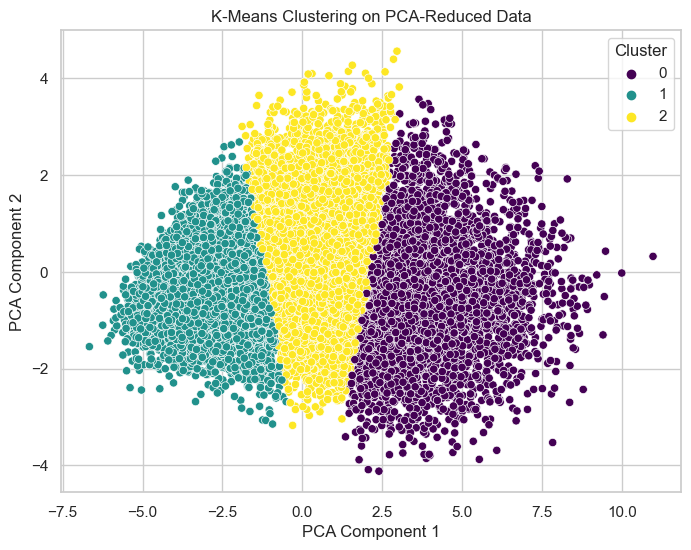

Explained variance ratio: [0.43767121 0.07529863]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


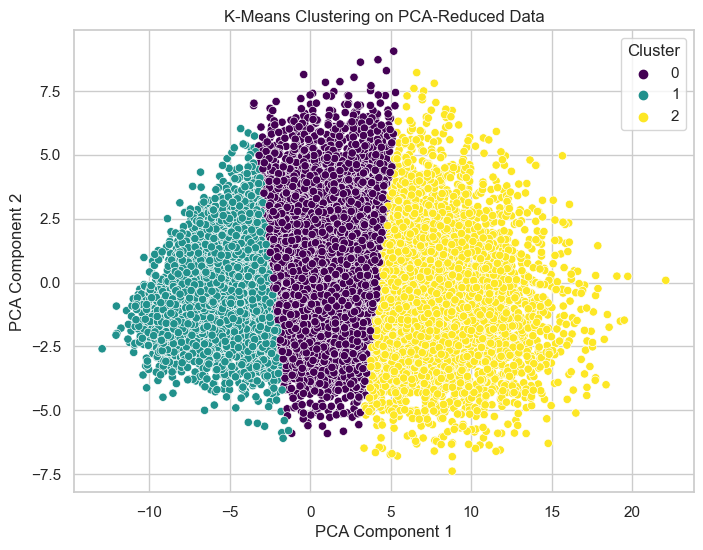

Explained variance ratio: [0.47539603 0.07444114]


In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it's a CSV with numerical features)
df = df_cell  # Replace with your file path

# Standardize features (important for PCA & clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Use 2 components for visualization
X_pca = pca.fit_transform(df)

# Apply K-Means clustering
num_clusters = 3  # Adjust based on exploration
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df['Cluster'] = clusters

# Visualize the clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.legend(title="Cluster")
plt.show()

# Explained variance (important features)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming it's a CSV with numerical features)
df = df_cell  # Replace with your file path

# Standardize features (important for PCA & clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Use 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
num_clusters = 3  # Adjust based on exploration
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df['Cluster'] = clusters

# Visualize the clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.legend(title="Cluster")
plt.show()

# Explained variance (important features)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Variance ratios aren't great. Going to try PCA = 3

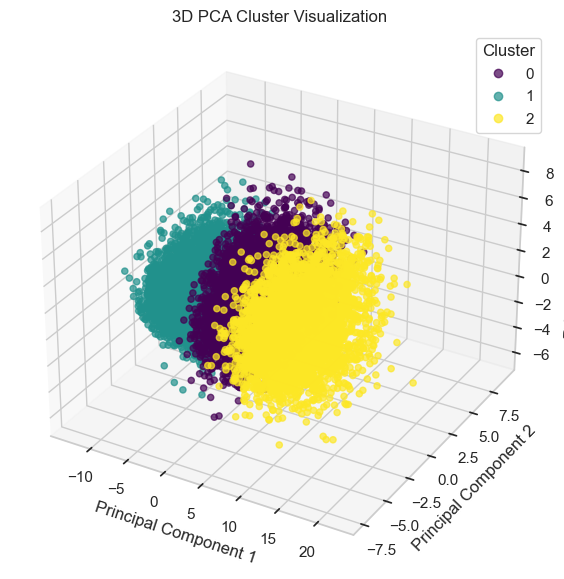

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca_3D = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
df['PC1'] = X_pca_3D[:, 0]
df['PC2'] = X_pca_3D[:, 1]
df['PC3'] = X_pca_3D[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Cluster'], cmap='viridis', alpha=0.7)

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Cluster Visualization")

# Add color legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")

plt.show()


Explained Variance Ratio: [0.47539603 0.07444114 0.06128467]
Total Variance Explained by 3 PCs: 0.61


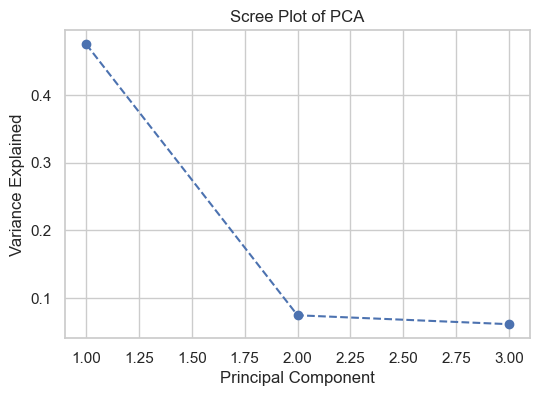

In [23]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained by 3 PCs: {sum(explained_variance):.2f}")
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot of PCA")
plt.show()

Going to look at the cumulative variance for the 3 PC's

Cumulative Variance: [0.47539603 0.54983716 0.61112183]


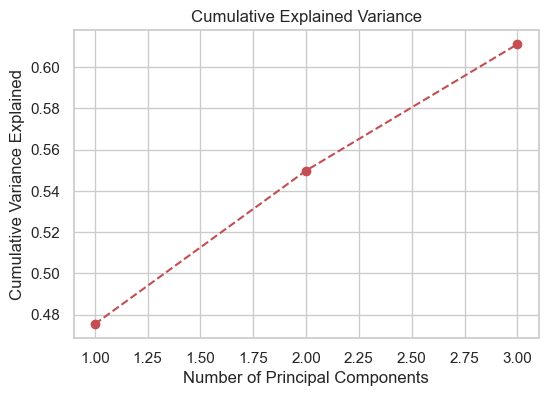

In [24]:
cumulative_variance = explained_variance.cumsum()
print(f"Cumulative Variance: {cumulative_variance}")

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Explained Variance")
plt.show()

In [146]:
for i in range(2, 28):
    pca = PCA(n_components=i)
    X_pca_3D = pca.fit_transform(X_scaled)
    print("Total variance explained, iteration ", i,  sum(pca.explained_variance_ratio_))  


Total variance explained, iteration  2 0.5683450826762428
Total variance explained, iteration  3 0.6250818736591943
Total variance explained, iteration  4 0.6693506392014257
Total variance explained, iteration  5 0.7032305903682993
Total variance explained, iteration  6 0.7328476851093465
Total variance explained, iteration  7 0.7588900236804184
Total variance explained, iteration  8 0.7823022154932856
Total variance explained, iteration  9 0.8022998832872045
Total variance explained, iteration  10 0.8185386076170436
Total variance explained, iteration  11 0.8343928393910045
Total variance explained, iteration  12 0.8492105315828236
Total variance explained, iteration  13 0.8620423705693107
Total variance explained, iteration  14 0.8735044362839647
Total variance explained, iteration  15 0.8842024337959976
Total variance explained, iteration  16 0.8938960481304048
Total variance explained, iteration  17 0.9034480635976401
Total variance explained, iteration  18 0.911995218369388
Total 

In [147]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/Users/justi/DATA_481_766_protein_networks-1/protein_networks/data/lung_cancer.csv", index_col=0)

# Combining HER2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined HER2 intensities
combined_HER2_intensity_02 = []
combined_HER2_intensity_04 = []

# Define the HER2 conditions for each fluorophore/antibody, for iteration 2 and 4
conditions_02 = ['02_HER2_nuc_mean', '02_HER2_ring_mean']
conditions_04 = ['04_HER2_nuc_mean', '04_HER2_ring_mean']

# Compute combined HER2 intensities for iteration 02
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '02_HER2_nuc_mean'] + data.loc[i, '02_HER2_ring_mean']) / 2
    combined_HER2_intensity_02.append(tmp)

# Compute combined HER2 intensities for iteration 04
for i in data.index:
    tmp = (data.loc[i, '04_HER2_nuc_mean'] + data.loc[i, '04_HER2_ring_mean']) / 2
    combined_HER2_intensity_04.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['02_HER2_combined'] = combined_HER2_intensity_02
data['04_HER2_combined'] = combined_HER2_intensity_04

# Display the first few rows to verify the new columns
print("Updated dataset with combined HER2 intensities:")
data.head()


Updated dataset with combined HER2 intensities:


01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_HER2_nuc_mean  02_CyclinD1_nuc_mean  02_EGFR_nuc_mean  \
index_column                                                             
cell_24               0.996370             -0.217049         -0.177764   
cell_31               0.416186             -0.523494         -0.444546   
cell_36               0.273643             -0.855136         -0.445459   
cell_43              -0.258488             -1.004050         -0.582779   
cell_51               0.909262             -0.538657          1.243933   

              03_FGFR2_nuc_mean  03_CDC6_nuc_mean  03_EZH2_nuc_mean  \
index_column                                                          
cell_24                0.109605          1.356144          0.482767   
cell_31               -0.218084          0.560125          0.388460   
cell_36               -0.495221          0.306739         -0.401794   
cell_43               -0.864614         -0.471185         -0.527605   
cell_51               -0.292941         -0.317952          0.356104   

              04_cMycS62_nuc_mean  04_FOXO1_nuc_mean  04_HER2_nuc_mean  \
index_column                                                             
cell_24                 -0.536020          -0.987532         -0.897249   
cell_31                  0.624579          -0.696834         -0.698082   
cell_36                  0.390856          -0.824935         -0.611346   
cell_43                 -0.821571          -0.864645         -0.990543   
cell_51                 -1.060728          -0.793165          0.505676   

              05_cMycT58_nuc_mean  05_CyclinA_nuc_mean  05_CyclinB1_nuc_mean  \
index_column                                                                   
cell_24                  0.243860            -0.927233             -0.002703   
cell_31                  0.404130             0.377436              0.506497   
cell_36                 -0.104029            -0.369246             -0.081758   
cell_43                 -0.607014            -0.717098             -0.687771   
cell_51                 -0.859886            -0.976564             -0.010725   

              06_FOXO3A_nuc_mean  06_AKT_nuc_mean  06_ZEB1_nuc_mean  \
index_column                                                          
cell_24                 0.406510        -0.457381          0.887332   
cell_31                 0.032809        -0.538555          0.346244   
cell_36                 0.202629        -0.745466         -0.057875   
cell_43                 0.153157        -0.843331         -0.112361   
cell_51                -0.142979         0.121853          1.201399   

              07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  07_p21_nuc_mean  \
index_column                                                             
cell_24                      0.114794       -0.430899         1.254235   
cell_31                      1.209497        0.987865         0.753873   
cell_36                      0.507749        0.167409         0.202370   
cell_43                      0.669902        0.363792        -0.009721   
cell_51                     -1.370445       -1.067327         0.643206   

              08_CDT1_nuc_mean  08_MDM2_nuc_mean  09_SKP2_nuc_mean  \
index_column                                                         
cell_24               1.871959          0.461608          0.422949   
cell_31              -0.235938         -0.070285          1.566281   
cell_36              -0.516313         -0.422799          1.228007   
cell_43              -0.684535         -0.385856          0

In [148]:
cond = '04_HER2_combined'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
data['HER2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
data.head() # Display the HER2 group and condition
print(len(data.loc[data[cond]>= top_10_percent, 'HER2_Group']), len(data.loc[data[cond]<= bottom_10_percent, 'HER2_Group']))


Updated dataset with HER2 groups:
1910 1910


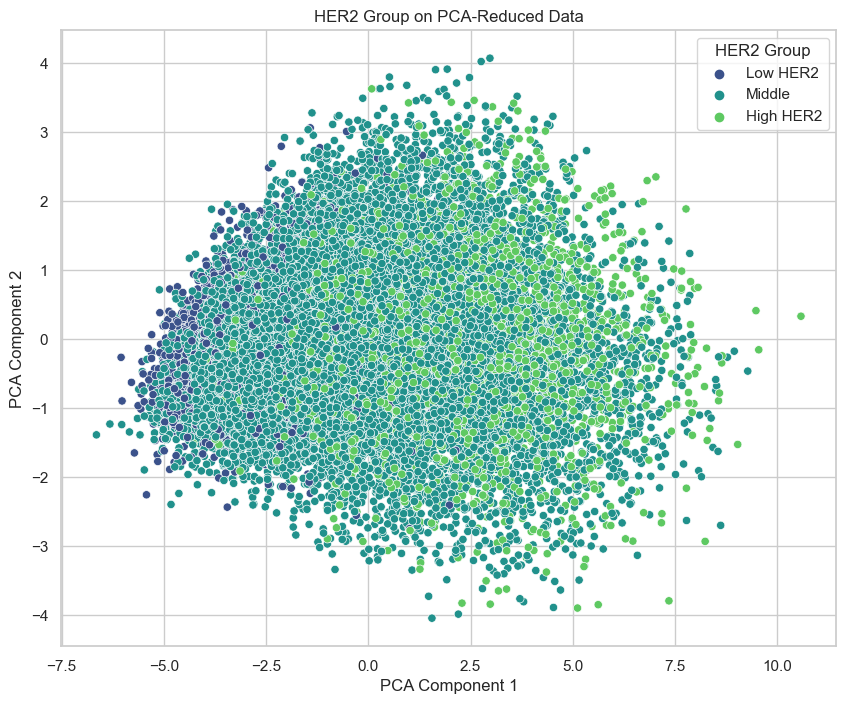

Explained variance ratio: [0.45717381 0.08024883]


01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_CyclinD1_nuc_mean  02_EGFR_nuc_mean  03_FGFR2_nuc_mean  \
index_column                                                              
cell_24                  -0.217049         -0.177764           0.109605   
cell_31                  -0.523494         -0.444546          -0.218084   
cell_36                  -0.855136         -0.445459          -0.495221   
cell_43                  -1.004050         -0.582779          -0.864614   
cell_51                  -0.538657          1.243933          -0.292941   

              03_CDC6_nuc_mean  03_EZH2_nuc_mean  04_cMycS62_nuc_mean  \
index_column                                                            
cell_24               1.356144          0.482767            -0.536020   
cell_31               0.560125          0.388460             0.624579   
cell_36               0.306739         -0.401794             0.390856   
cell_43              -0.471185         -0.527605            -0.821571   
cell_51              -0.317952          0.356104            -1.060728   

              04_FOXO1_nuc_mean  05_cMycT58_nuc_mean  05_CyclinA_nuc_mean  \
index_column                                                                
cell_24               -0.987532             0.243860            -0.927233   
cell_31               -0.696834             0.404130             0.377436   
cell_36               -0.824935            -0.104029            -0.369246   
cell_43               -0.864645            -0.607014            -0.717098   
cell_51               -0.793165            -0.859886            -0.976564   

              05_CyclinB1_nuc_mean  06_FOXO3A_nuc_mean  06_AKT_nuc_mean  \
index_column                                                              
cell_24                  -0.002703            0.406510        -0.457381   
cell_31                   0.506497            0.032809        -0.538555   
cell_36                  -0.081758            0.202629        -0.745466   
cell_43                  -0.687771            0.153157        -0.843331   
cell_51                  -0.010725           -0.142979         0.121853   

              06_ZEB1_nuc_mean  07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  \
index_column                                                              
cell_24               0.887332                 0.114794       -0.430899   
cell_31               0.346244                 1.209497        0.987865   
cell_36              -0.057875                 0.507749        0.167409   
cell_43              -0.112361                 0.669902        0.363792   
cell_51               1.201399                -1.370445       -1.067327   

              07_p21_nuc_mean  08_CDT1_nuc_mean  08_MDM2_nuc_mean  \
index_column                                                        
cell_24              1.254235          1.871959          0.461608   
cell_31              0.753873         -0.235938         -0.070285   
cell_36              0.202370         -0.516313         -0.422799   
cell_43             -0.009721         -0.684535         -0.385856   
cell_51              0.643206         -0.438881          1.183240   

              09_SKP2_nuc_mean  09_mTOR_nuc_mean  10_TGFbeta_nuc_mean  \
index_column                                                            
cell_24               0.422949          1.406970            -0.434054   
cell_31               1.566281          0.917627            -0.004364   
cell_36               1.228007          0.500917             0.007855   
cell_43               0.154523          0.35

In [149]:
scaler = StandardScaler()
pca_data = data.loc[:, '01_cMyc_nuc_mean':'12_cPARP_ring_mean']
pca_data_2 = pca_data.drop(['02_HER2_nuc_mean', '04_HER2_nuc_mean', '02_HER2_ring_mean', '04_HER2_ring_mean',], axis="columns")
X_scaled = scaler.fit_transform(pca_data_2)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Use 2 components for visualization
X_pca = pca.fit_transform(pca_data_2)

# Visualize
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['HER2_Group'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("HER2 Group on PCA-Reduced Data")
plt.legend(title="HER2 Group")
plt.show()

# Explained variance (important features)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
pca_data_2.head()


In [150]:
p1_components = pca.components_[0]
p2_components = pca.components_[1]

p1_top_5_indices = np.argsort(p1_components)[-5:][::-1]
p2_top_5_indices = np.argsort(p2_components)[-5:][::-1]

p1_top_5 = [[pca_data_2.columns[i], p1_components[i]] for i in p1_top_5_indices]
p2_top_5 = [[pca_data_2.columns[i], p2_components[i]] for i in p2_top_5_indices]

print("PC1 5 most prominent features: ", p1_top_5)
print("PC2 5 most prominent features: ", p2_top_5)

pc_features_1 = pd.DataFrame(p1_top_5, columns=['PC1 Feature', 'Loading'])
pc_features_2 = pd.DataFrame(p2_top_5, columns=['PC2 Feature', 'Loading'])


pc_features_1


PC1 5 most prominent features:  [['09_mTOR_ring_mean', 0.17436823685437244], ['05_CyclinB1_ring_mean', 0.16296760361994186], ['05_CyclinA_ring_mean', 0.1604967618034967], ['10_TGFbeta_ring_mean', 0.1574327402191715], ['09_mTOR_nuc_mean', 0.15725948288606892]]
PC2 5 most prominent features:  [['07_pRb_S807811_nuc_mean', 0.2950388360926326], ['05_CyclinA_nuc_mean', 0.29397055354445056], ['09_SKP2_nuc_mean', 0.2541729397466851], ['07_Rb_nuc_mean', 0.2341330755126422], ['01_BRD4_nuc_mean', 0.22106690722969966]]


PC1 Feature   Loading
0      09_mTOR_ring_mean  0.174368
1  05_CyclinB1_ring_mean  0.162968
2   05_CyclinA_ring_mean  0.160497
3   10_TGFbeta_ring_mean  0.157433
4       09_mTOR_nuc_mean  0.157259

In [151]:
pc_features_2

PC2 Feature   Loading
0  07_pRb_S807811_nuc_mean  0.295039
1      05_CyclinA_nuc_mean  0.293971
2         09_SKP2_nuc_mean  0.254173
3           07_Rb_nuc_mean  0.234133
4         01_BRD4_nuc_mean  0.221067

In [152]:
pca_data_3 =pd.DataFrame(X_pca[:, :])

pca_data_3.head()


0         1
0  3.459825 -2.017384
1  3.963634  0.842239
2  0.461402  0.354392
3 -2.766910  0.431476
4 -1.595043 -0.658360

In [153]:
for i in range(2, 28):
    pca = PCA(n_components=i)
    X_pca_3D = pca.fit_transform(X_scaled)
    print("Total variance explained, iteration", i, ": ",  sum(pca.explained_variance_ratio_))


Total variance explained, iteration 2 :  0.5683450826764977
Total variance explained, iteration 3 :  0.625081873627172
Total variance explained, iteration 4 :  0.6693506391274033
Total variance explained, iteration 5 :  0.703230590708847
Total variance explained, iteration 6 :  0.7328466932452191
Total variance explained, iteration 7 :  0.7588893016961801
Total variance explained, iteration 8 :  0.7823008458543861
Total variance explained, iteration 9 :  0.8022935320561568
Total variance explained, iteration 10 :  0.8185398293052247
Total variance explained, iteration 11 :  0.8344301553060276
Total variance explained, iteration 12 :  0.849201311880232
Total variance explained, iteration 13 :  0.8620481349517838
Total variance explained, iteration 14 :  0.8735020413521577
Total variance explained, iteration 15 :  0.8842055142765037
Total variance explained, iteration 16 :  0.893897237349107
Total variance explained, iteration 17 :  0.9034463723938475
Total variance explained, iteration 

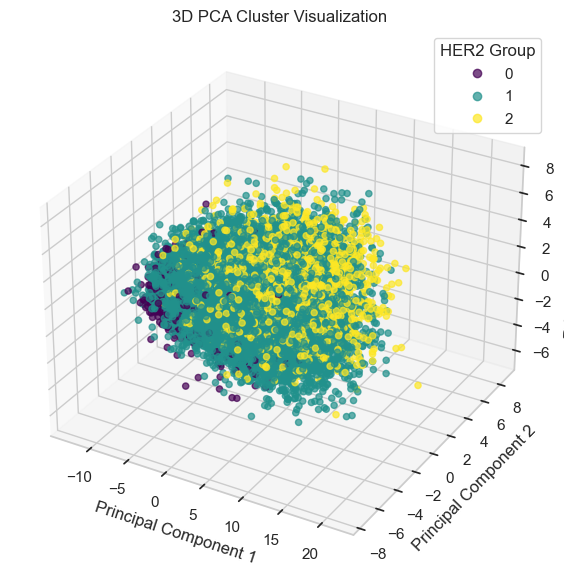

Explained variance ratio: [0.49111002 0.07723506 0.05673679]


In [154]:
# Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca_3D = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
data['PC1'] = X_pca_3D[:, 0]
data['PC2'] = X_pca_3D[:, 1]
data['PC3'] = X_pca_3D[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

cats = []
for i in data['HER2_Group']:
    if i == 'Low HER2':
        cats.append(0)
    elif i == 'Middle':
        cats.append(1)
    else:
        cats.append(2)

# Scatter plot with cluster colors
scatter = ax.scatter(data['PC1'], data['PC2'], data['PC3'], c=cats, cmap='viridis', alpha=0.7)

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Cluster Visualization")

# Add color legend
legend = ax.legend(*scatter.legend_elements(), title="HER2 Group", loc="upper right")

plt.show()
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


In [155]:
import umap

reducer = umap.UMAP(n_neighbors=5, min_dist=1, n_components=2)

scaler = StandardScaler()
umap_data = data.loc[:, '01_cMyc_nuc_mean':'12_cPARP_ring_mean']
umap_data_2 = umap_data.drop(['02_HER2_nuc_mean', '04_HER2_nuc_mean', '02_HER2_ring_mean', '04_HER2_ring_mean',], axis="columns")
X_umap_scaled = scaler.fit_transform(umap_data_2)

umap_data_2.head()


01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_CyclinD1_nuc_mean  02_EGFR_nuc_mean  03_FGFR2_nuc_mean  \
index_column                                                              
cell_24                  -0.217049         -0.177764           0.109605   
cell_31                  -0.523494         -0.444546          -0.218084   
cell_36                  -0.855136         -0.445459          -0.495221   
cell_43                  -1.004050         -0.582779          -0.864614   
cell_51                  -0.538657          1.243933          -0.292941   

              03_CDC6_nuc_mean  03_EZH2_nuc_mean  04_cMycS62_nuc_mean  \
index_column                                                            
cell_24               1.356144          0.482767            -0.536020   
cell_31               0.560125          0.388460             0.624579   
cell_36               0.306739         -0.401794             0.390856   
cell_43              -0.471185         -0.527605            -0.821571   
cell_51              -0.317952          0.356104            -1.060728   

              04_FOXO1_nuc_mean  05_cMycT58_nuc_mean  05_CyclinA_nuc_mean  \
index_column                                                                
cell_24               -0.987532             0.243860            -0.927233   
cell_31               -0.696834             0.404130             0.377436   
cell_36               -0.824935            -0.104029            -0.369246   
cell_43               -0.864645            -0.607014            -0.717098   
cell_51               -0.793165            -0.859886            -0.976564   

              05_CyclinB1_nuc_mean  06_FOXO3A_nuc_mean  06_AKT_nuc_mean  \
index_column                                                              
cell_24                  -0.002703            0.406510        -0.457381   
cell_31                   0.506497            0.032809        -0.538555   
cell_36                  -0.081758            0.202629        -0.745466   
cell_43                  -0.687771            0.153157        -0.843331   
cell_51                  -0.010725           -0.142979         0.121853   

              06_ZEB1_nuc_mean  07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  \
index_column                                                              
cell_24               0.887332                 0.114794       -0.430899   
cell_31               0.346244                 1.209497        0.987865   
cell_36              -0.057875                 0.507749        0.167409   
cell_43              -0.112361                 0.669902        0.363792   
cell_51               1.201399                -1.370445       -1.067327   

              07_p21_nuc_mean  08_CDT1_nuc_mean  08_MDM2_nuc_mean  \
index_column                                                        
cell_24              1.254235          1.871959          0.461608   
cell_31              0.753873         -0.235938         -0.070285   
cell_36              0.202370         -0.516313         -0.422799   
cell_43             -0.009721         -0.684535         -0.385856   
cell_51              0.643206         -0.438881          1.183240   

              09_SKP2_nuc_mean  09_mTOR_nuc_mean  10_TGFbeta_nuc_mean  \
index_column                                                            
cell_24               0.422949          1.406970            -0.434054   
cell_31               1.566281          0.917627            -0.004364   
cell_36               1.228007          0.500917             0.007855   
cell_43               0.154523          0.35

In [156]:
embedding = reducer.fit_transform(X_umap_scaled)
embedding.shape


(19096, 2)

<Figure size 1500x1300 with 0 Axes>

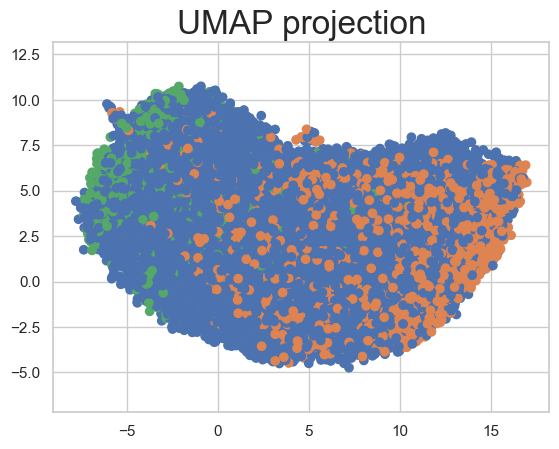

<Figure size 1500x1300 with 0 Axes>

In [157]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in data['HER2_Group'].map({"Middle":0, "High HER2":1, "Low HER2":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.figure(figsize=(15, 13))
